In [23]:
# !pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ------------ --------------------------- 92.2/300.2 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 4.7 MB/s eta 0:00:00


In [1]:
from bs4 import BeautifulSoup
import requests
import random
import time
import pandas as pd

In [3]:
url = requests.get("https://search.naver.com/search.naver?ssc=tab.news.all&where=news&sm=tab_jum&query=%ED%95%98%EB%82%98%EC%9D%80%ED%96%89")
html = BeautifulSoup(url.text)

In [6]:
box1 = []
for i in html.find_all("a",class_='news_tit'):
    title = i['title']
    box1.append(title)
    
box1

["하나은행, '하나인증서' 16개국 언어로 발급 지원",
 '하나은행, 수출 중소·중견기업 지원 위해 400억원 출연',
 "하나은행, '하나인증서' 다국어 발급 서비스 시행",
 '하나은행, 수출 中企 우대 금융지원에 400억 원 출연',
 '하나은행, 무보와 수출 중소·중견기업에 5000억 원 지원',
 '하나은행, 어린이 금융교육 ‘하나 둘 셋, 금융아 놀자!’ 시행',
 '하나은행, 수출 중기 5000억 지원…무역보험공사에 400억 출연',
 "하나은행, '하나인증서' 다국어 발급‧외국인 실명번호 비대면 변경 서비스",
 '하나은행, 중소·중견기업 지원 위한 수출패키지 실시',
 '하나은행, 은행권 최초 다국어 인증서 발급·비대면 실명번호 변경 지원']

In [14]:
box2=[]
for i in html.find_all("div",class_='dsc_wrap'):
    box2.append(i.text.strip())
    
box2

["외국인 실명 번호 비대면 변경 서비스도 하나은행은 해외송금 전용 앱 '하나EZ'에서 16개국 언어로 '하나인증서' 발급을 지원하고, 외국인 실명 번호 비대면 변경 서비스를 시행한다고 4일 밝혔다. 이를 통해 국내 체류 외국인들은 '하나EZ' 앱에서 언어장벽 없이 사설 인증서인 '하나인증서'를 발급받을 수 있게...",
 '하나은행은 한국무역보험공사와 업무협약을 맺고 수출 중소·중견기업의 유동성 지원을 위한 약 5000억원 규모의 ‘수출패키지 우대금융’ 프로그램을 실시한다고 3일 밝혔다. 하나은행은 특별출연 300억원 및 보증·보험료 100억원 등 기금 총 400억원을 출연한다. 이를 통해 성장 잠재력이 있는 수출 중소...',
 "하나은행은 다국어 지원 해외송금 전용 앱 '하나EZ'에서 16개국 언어로 ‘하나인증서’ 발급 지원 및 외국인 실명번호 비대면 변경 서비스를 은행권 최초로 시행한다고 밝혔다. ‘하나인증서’ 다국어 발급 지원 서비스를 통해 국내 체류 외국인들은 ‘하나EZ’ 앱에서 언어장벽 없이 손쉽게 ‘하나인증서’를...",
 "하나은행이 400억원을 특별출연해 수출 중소·중견기업 지원에 나선다. 하나은행은 한국무역보험공사와 함께 수출 중소·중견기업을 대상으로 약 5000억원 규모의 '수출패키지 우대금융' 프로그램을 실시한다고 3일 밝혔다. 이번 협약을 통해 하나은행은 특별출연 300억원과 보증·보험료 100억원 등 기금 총...",
 '이투데이=손희정 기자 | 하나은행은 한국무역보험공사와 업무협약을 맺고 고물가 및 경기둔화 등으로 어려움을 겪고 있는 수출 중소ㆍ중견기업의 유동성 지원을 위한 약 5000억 원 규모의 ‘수출패키지 우대금융’ 프로그램을 실시한다고 4일 밝혔다. 이번 협약은 하나은행이 특별출연 300억 원 및 보증ㆍ보험료...',
 '하나은행(은행장 이승열)은 어린이들을 위한 금융교육 프로그램인 ‘하나 둘 셋, 금융아 놀자!’를 시행한다고 4일 밝혔다. ‘하나 둘 셋, 금융아 놀자!’는 초등학교 학생들을 대상으로 화폐 속에 숨겨진 비밀과

In [15]:
len(box1), len(box2)

(10, 10)

In [17]:
rst = pd.DataFrame({'제목':box1,'요약' : box2})
rst['내용'] = rst['제목']+ " " + rst['요약']
rst

,제목,요약,내용
0,"하나은행, '하나인증서' 16개국 언어로 발급 지원",외국인 실명 번호 비대면 변경 서비스도 하나은행은 해외송금 전용 앱 '하나EZ'에서...,"하나은행, '하나인증서' 16개국 언어로 발급 지원 외국인 실명 번호 비대면 변경 ..."
1,"하나은행, 수출 중소·중견기업 지원 위해 400억원 출연",하나은행은 한국무역보험공사와 업무협약을 맺고 수출 중소·중견기업의 유동성 지원을 위...,"하나은행, 수출 중소·중견기업 지원 위해 400억원 출연 하나은행은 한국무역보험공사..."
2,"하나은행, '하나인증서' 다국어 발급 서비스 시행",하나은행은 다국어 지원 해외송금 전용 앱 '하나EZ'에서 16개국 언어로 ‘하나인증...,"하나은행, '하나인증서' 다국어 발급 서비스 시행 하나은행은 다국어 지원 해외송금 ..."
3,"하나은행, 수출 中企 우대 금융지원에 400억 원 출연",하나은행이 400억원을 특별출연해 수출 중소·중견기업 지원에 나선다. 하나은행은 한...,"하나은행, 수출 中企 우대 금융지원에 400억 원 출연 하나은행이 400억원을 특별..."
4,"하나은행, 무보와 수출 중소·중견기업에 5000억 원 지원",이투데이=손희정 기자 | 하나은행은 한국무역보험공사와 업무협약을 맺고 고물가 및 경...,"하나은행, 무보와 수출 중소·중견기업에 5000억 원 지원 이투데이=손희정 기자 |..."
5,"하나은행, 어린이 금융교육 ‘하나 둘 셋, 금융아 놀자!’ 시행","하나은행(은행장 이승열)은 어린이들을 위한 금융교육 프로그램인 ‘하나 둘 셋, 금융...","하나은행, 어린이 금융교육 ‘하나 둘 셋, 금융아 놀자!’ 시행 하나은행(은행장 이..."
6,"하나은행, 수출 중기 5000억 지원…무역보험공사에 400억 출연",하나은행이 400억원을 출연하면서 수출 중소·중견기업 지원에 나섰다. 하나은행은 한...,"하나은행, 수출 중기 5000억 지원…무역보험공사에 400억 출연 하나은행이 400..."
7,"하나은행, '하나인증서' 다국어 발급‧외국인 실명번호 비대면 변경 서비스",하나은행은 다국어 지원 해외송금 전용 앱 '하나EZ'에서 16개국 언어로 '하나인증...,"하나은행, '하나인증서' 다국어 발급‧외국인 실명번호 비대면 변경 서비스 하나은행은..."
8,"하나은행, 중소·중견기업 지원 위한 수출패키지 실시",사진/ 하나은랭 상생금융 지원에 발벗고 나선 하나은행(은행장 이승열)이 한국무역보험...,"하나은행, 중소·중견기업 지원 위한 수출패키지 실시 사진/ 하나은랭 상생금융 지원에..."
9,"하나은행, 은행권 최초 다국어 인증서 발급·비대면 실명번호 변경 지원",하나은행이 은행권 최초로 다국어 인증서 발급 지원 및 외국인 실명번호 비대면 변경 ...,"하나은행, 은행권 최초 다국어 인증서 발급·비대면 실명번호 변경 지원 하나은행이 은..."


In [20]:
words = []
for i in rst['내용']:
    words += i.split()
    
len(words)

439

#### 빈도분석

In [22]:
dic = {}
for i in words:
    if i not in dic:
        dic[i]=1
    else:
        dic[i]+=1
dic

{'하나은행,': 10,
 "'하나인증서'": 5,
 '16개국': 4,
 '언어로': 4,
 '발급': 7,
 '지원': 12,
 '외국인': 5,
 '실명': 2,
 '번호': 2,
 '비대면': 6,
 '변경': 7,
 '서비스도': 1,
 '하나은행은': 10,
 '해외송금': 3,
 '전용': 3,
 '앱': 3,
 "'하나EZ'에서": 3,
 '발급을': 1,
 '지원하고,': 1,
 '서비스를': 6,
 '시행한다고': 4,
 '4일': 4,
 '밝혔다.': 7,
 '이를': 2,
 '통해': 5,
 '국내': 4,
 '체류': 4,
 '외국인들은': 3,
 "'하나EZ'": 1,
 '앱에서': 2,
 '언어장벽': 2,
 '없이': 3,
 '사설': 1,
 '인증서인': 1,
 "'하나인증서'를": 1,
 '발급받을': 2,
 '수': 2,
 '있게...': 1,
 '수출': 12,
 '중소·중견기업': 4,
 '위해': 1,
 '400억원': 1,
 '출연': 3,
 '한국무역보험공사와': 5,
 '업무협약을': 3,
 '맺고': 3,
 '중소·중견기업의': 2,
 '유동성': 3,
 '지원을': 3,
 '위한': 5,
 '약': 5,
 '5000억원': 4,
 '규모의': 5,
 '‘수출패키지': 2,
 '우대금융’': 2,
 '프로그램을': 5,
 '실시한다고': 4,
 '3일': 3,
 '특별출연': 4,
 '300억원': 1,
 '및': 8,
 '보증·보험료': 3,
 '100억원': 3,
 '등': 3,
 '기금': 3,
 '총': 2,
 '400억원을': 4,
 '출연한다.': 1,
 '성장': 1,
 '잠재력이': 1,
 '있는': 3,
 '중소...': 1,
 '다국어': 8,
 '서비스': 2,
 '시행': 2,
 '‘하나인증서’': 2,
 '실명번호': 5,
 '은행권': 4,
 '최초로': 3,
 '‘하나EZ’': 2,
 '손쉽게': 1,
 '‘하나인증서’를...': 1,
 '中企': 1,
 '우대': 1,
 '금융지원에':

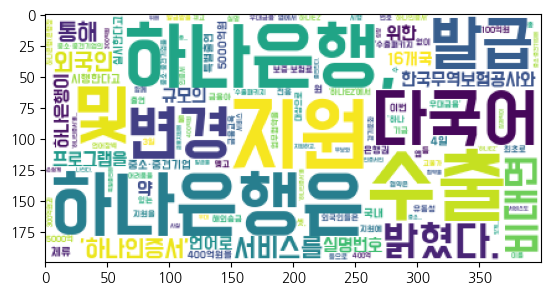

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white', font_path='참고 파일/BMDOHYEON_ttf.ttf')
cloud = wc.generate_from_frequencies(dic)

plt.imshow(cloud)
plt.show()

In [35]:
#워드 클라우드에서 그리고 싶은 영역이 있다면, 무조건 검은색 배경이어야 함
#모든 색상이 0 이어야 한다! (올 검은색)

from PIL import Image
import numpy as np

image = Image.open("참고 파일/하트.png")
image = np.array(image)
image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

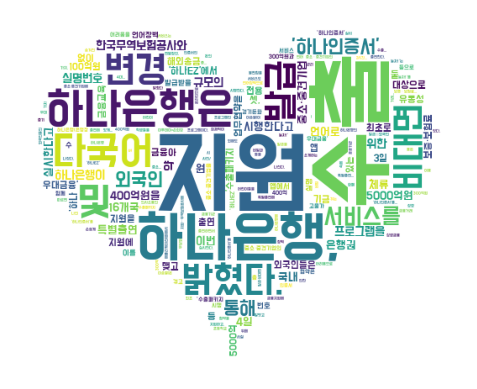

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white', 
               font_path='참고 파일/BMDOHYEON_ttf.ttf',
              mask = image)
cloud = wc.generate_from_frequencies(dic)

plt.imshow(cloud)
plt.axis('off')
plt.show()

### 정규표현식 : 문자열에서 특정 패턴을 찾는 것

학습 링크 : [regexone](https://regexone.com/lesson/matching_characters?)

In [38]:
text = """
안녕하세요,

문의사항이 있으면 아래 이메일로 연락주세요.

고객 지원: support@example.com
마케팅 팀: marketing.team@example.org
인사부: hr.department@example.net
개인 문의: jane.doe123@example.com
프로젝트 관련: project_management@example.co.uk

또한, 특별한 요청이 있는 경우 다음 연락처로도 연락할 수 있습니다.

기술 지원: tech.support@example.io
긴급 문의: urgent@example.com
피드백: feedback@example.biz

감사합니다.

Best regards,
회사명
"""

In [47]:
import re

re.findall("[a-zA-Z0-9_.]+@[a-zA-Z.]+\.[a-zA-Z]{2,}",text)

['support@example.com',
 'marketing.team@example.org',
 'hr.department@example.net',
 'jane.doe123@example.com',
 'project_management@example.co.uk',
 'tech.support@example.io',
 'urgent@example.com',
 'feedback@example.biz']

# 0305

In [1]:
from bs4 import BeautifulSoup
import requests
import random
import time
import pandas as pd

post               
- 페이지에 원하는 정보를 보내고 받아오는 함수
- get : 페이지에서 정보를 가져오는 함수

---

페이지에 정보를 보낼때 내가 필요한 정보들을 확인하는 방법
1. F12 창을 켜서 Network 탭 클릭
2. 창에 새로운 버튼을 클릭했을 때 네트워크 발생
3. 맨 위 field_submit.~~ 를 누르면 Headers에서 Request URL을 확인 가능
4. payload를 클릭시 내가 요청한 것에 대한 정보 확인 가능 (ex: pbr, operating_profit)
5. Headers탭의 ReqeustURL의 핵심 url만 가져오기 (핵심 url은 주로 ? 전까지)


In [4]:
dic = {'menu':'market_sum',
      'returnUrl': "http://finance.naver.com/sise/sise_market_sum.naver",
      'fieldIds':['pbr','operating_profit']} # 값이 여러개면 [] 묶기

# 이 페이지에서 정보를 보낸다
# 메뉴는 마켓썸, 필드아이디는 pbr과 operating_profit 이다
url = requests.post("https://finance.naver.com/sise/field_submit.naver", data=dic)
html = BeautifulSoup(url.text)

In [63]:
table = html.find("table" , class_='type_2')
table = pd.read_html(str(table))[0]
table

,N,종목명,현재가,전일비,등락률,액면가,거래량,거래대금,전일거래량,시가,...,보통주배당금,매출액증가율,영업이익증가율,외국인비율,PER,ROE,ROA,PBR,유보율,토론실
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,삼성전자,74500.0,400.0,-0.53%,100.0,5308958.0,395184.0,23210474.0,74600.0,...,1444.0,-14.33,-84.86,54.66,34.96,4.15,3.43,1.43,39114.3,NaN
2,2.0,SK하이닉스,166300.0,200.0,-0.12%,5000.0,878425.0,145600.0,5230909.0,165100.0,...,1200.0,3.78,-45.13,54.29,-10.54,3.56,2.24,2.07,1668.3,NaN
3,3.0,LG에너지솔루션,398000.0,500.0,-0.13%,500.0,41256.0,16285.0,170895.0,396000.0,...,NaN,43.39,57.94,4.91,61.21,5.75,2.51,4.54,15657.4,NaN
4,4.0,삼성바이오로직스,789000.0,15000.0,+1.94%,2500.0,15283.0,11907.0,82555.0,770000.0,...,NaN,23.10,13.22,11.78,65.47,9.12,5.26,5.71,5432.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,49.0,KODEX CD금리액티브(합성),1028735.0,100.0,+0.01%,0.0,54904.0,56481.0,171799.0,1028730.0,...,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN
77,50.0,하이브,189600.0,3100.0,-1.61%,500.0,98441.0,18730.0,365721.0,192700.0,...,0.0,41.42,24.53,20.83,102.43,1.87,1.00,2.50,13945.5,NaN
78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 네이버증권 체크박스 모두 불러와서 테이블로 만들기

In [60]:
box = []
url = requests.get("http://finance.naver.com/sise/sise_market_sum.naver")
html = BeautifulSoup(url.text)
for i in html.find_all('input',attrs={'name':'fieldIds'}):
    box.append(i['value'])
len(box)

27

In [61]:
dic = {'menu':'market_sum',
      'returnUrl': "http://finance.naver.com/sise/sise_market_sum.naver",
      'fieldIds':box} # 값이 여러개면 [] 묶기

# 이 페이지에서 정보를 보낸다
# 메뉴는 마켓썸, 필드아이디는 pbr과 operating_profit 이다
url = requests.post("https://finance.naver.com/sise/field_submit.naver", data=dic)
html = BeautifulSoup(url.text)

In [62]:
table = html.find("table" , class_='type_2')
table = pd.read_html(str(table))[0]
table.head(3)

,N,종목명,현재가,전일비,등락률,액면가,거래량,거래대금,전일거래량,시가,...,보통주배당금,매출액증가율,영업이익증가율,외국인비율,PER,ROE,ROA,PBR,유보율,토론실
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,삼성전자,74500.0,400.0,-0.53%,100.0,5308958.0,395184.0,23210474.0,74600.0,...,1444.0,-14.33,-84.86,54.66,34.96,4.15,3.43,1.43,39114.3,NaN
2,2.0,SK하이닉스,166300.0,200.0,-0.12%,5000.0,878425.0,145600.0,5230909.0,165100.0,...,1200.0,3.78,-45.13,54.29,-10.54,3.56,2.24,2.07,1668.3,NaN


### 모든 코스피, 코스닥 페이지 + 모든 옵션 다 가져오기

In [80]:
from bs4 import BeautifulSoup
import requests
import random
import time
import pandas as pd

pi_url = requests.get("https://finance.naver.com/sise/sise_market_sum.naver?sosok=0&page=1")
pi_html = BeautifulSoup(pi_url.text)

kospi_page = int(pi_html.find('td', class_ = "pgRR").find('a')['href'][-2:])

daq_url = requests.get("https://finance.naver.com/sise/sise_market_sum.naver?sosok=1&page=1")
daq_html = BeautifulSoup(daq_url.text)

kosdaq_page = int(daq_html.find('td', class_ = "pgRR").find('a')['href'][-2:])

print(kospi_page, kosdaq_page)

box = []
url = requests.get("http://finance.naver.com/sise/sise_market_sum.naver")
html = BeautifulSoup(url.text)
for i in html.find_all('input',attrs={'name':'fieldIds'}):
    box.append(i['value'])
len(box)

44 35


27

In [81]:
def make_table(html):    
    table = html.find("table" , class_='type_2')
    table = pd.read_html(str(table))[0]
    table = table.drop(['N','토론실'],axis=1)
    table = table[table['종목명'].notnull()]
    return table

In [82]:
# for문 진행사항 확인
from tqdm import tqdm

kospi_box=[]
kosdaq_box = []

for n in tqdm(range(1, kospi_page+1)):
    dic = {'menu':'market_sum',
      'returnUrl': f"http://finance.naver.com/sise/sise_market_sum.naver?sosok=0&page={n}",
      'fieldIds':box}
    url = requests.post(f"https://finance.naver.com/sise/field_submit.naver", data=dic)
    html = BeautifulSoup(url.text)
    table = make_table(html)
    kospi_box.append(table)
    time.sleep(random.random()+0.75)
    
for n in tqdm(range(1, kosdaq_page+1)):
    dic = {'menu':'market_sum',
      'returnUrl': f"http://finance.naver.com/sise/sise_market_sum.naver?sosok=1&page={n}",
      'fieldIds':box}
    url = requests.post(f"https://finance.naver.com/sise/field_submit.naver", data=dic)
    html = BeautifulSoup(url.text)
    table = make_table(html)
    kosdaq_box.append(table)
    time.sleep(random.random()+0.75)

100%|██████████████████████████████████████████████████████████████████████████████████| 35/35 [00:58<00:00,  1.66s/it]


In [86]:
kospi = pd.concat(kospi_box, ignore_index=True)
kospi['소속'] = '코스피'
kosdaq = pd.concat(kosdaq_box, ignore_index=True)
kosdaq['소속']='코스닥'

stock = pd.concat([kospi,kosdaq])
stock

,종목명,현재가,전일비,등락률,액면가,거래량,거래대금,전일거래량,시가,고가,...,보통주배당금,매출액증가율,영업이익증가율,외국인비율,PER,ROE,ROA,PBR,유보율,소속
0,삼성전자,74200.0,700.0,-0.93%,100.0,7880398.0,586240.0,23210474.0,74600.0,74800.0,...,1444.0,-14.33,-84.86,54.66,34.82,4.15,3.43,1.43,39114.3,코스피
1,SK하이닉스,165800.0,700.0,-0.42%,5000.0,1351335.0,224203.0,5230909.0,165100.0,167000.0,...,1200.0,3.78,-45.13,54.29,-10.51,3.56,2.24,2.07,1668.3,코스피
2,LG에너지솔루션,389000.0,9500.0,-2.38%,500.0,103901.0,40853.0,170895.0,396000.0,398500.0,...,NaN,43.39,57.94,4.91,59.83,5.75,2.51,4.44,15657.4,코스피
3,삼성바이오로직스,784000.0,10000.0,+1.29%,2500.0,28672.0,22479.0,82555.0,770000.0,794000.0,...,NaN,23.10,13.22,11.78,65.06,9.12,5.26,5.68,5432.6,코스피
4,현대차,251500.0,4000.0,-1.57%,5000.0,689833.0,173421.0,1854280.0,251500.0,254500.0,...,7000.0,21.19,47.03,37.51,6.05,9.36,3.26,0.72,5654.5,코스피
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712,키움제6호스팩,2175.0,5.0,-0.23%,100.0,12.0,0.0,2608.0,2155.0,2175.0,...,NaN,NaN,-510.95,0.09,217.50,0.24,0.18,1.13,1822.4,코스닥
1713,에스케이증권제10호스팩,2245.0,30.0,-1.32%,100.0,1623.0,4.0,8775.0,2260.0,2285.0,...,NaN,NaN,NaN,0.00,NaN,NaN,NaN,1.15,NaN,코스닥
1714,엔에이치스팩25호,2460.0,0.0,0.00%,100.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.29,102.50,NaN,NaN,1.32,1729.9,코스닥
1715,소프트센우,10590.0,10.0,+0.09%,200.0,260.0,3.0,1066.0,10420.0,10590.0,...,NaN,NaN,NaN,0.26,423.60,NaN,NaN,15.16,NaN,코스닥


In [87]:
kospi.shape, kosdaq.shape

((2161, 33), (1717, 33))

In [90]:
stock.to_excel('생성 파일/20240305주식.xlsx', index=False)

In [166]:
stock.columns

Index(['종목명', '현재가', '전일비', '등락률', '액면가', '거래량', '거래대금', '전일거래량', '시가', '고가',
       '저가', '매수호가', '매도호가', '매수총잔량', '매도총잔량', '상장주식수', '시가총액', '매출액', '자산총계',
       '부채총계', '영업이익', '당기순이익', '주당순이익', '보통주배당금', '매출액증가율', '영업이익증가율',
       '외국인비율', 'PER', 'ROE', 'ROA', 'PBR', '유보율', '소속'],
      dtype='object')

In [173]:
stock = pd.read_excel('생성 파일/20240305주식.xlsx')
stock

,종목명,현재가,전일비,등락률,액면가,거래량,거래대금,전일거래량,시가,고가,...,보통주배당금,매출액증가율,영업이익증가율,외국인비율,PER,ROE,ROA,PBR,유보율,소속
0,삼성전자,74200,700,-0.93%,100,7880398,586240,23210474,74600,74800,...,1444.0,-14.33,-84.86,54.66,34.82,4.15,3.43,1.43,39114.3,코스피
1,SK하이닉스,165800,700,-0.42%,5000,1351335,224203,5230909,165100,167000,...,1200.0,3.78,-45.13,54.29,-10.51,3.56,2.24,2.07,1668.3,코스피
2,LG에너지솔루션,389000,9500,-2.38%,500,103901,40853,170895,396000,398500,...,NaN,43.39,57.94,4.91,59.83,5.75,2.51,4.44,15657.4,코스피
3,삼성바이오로직스,784000,10000,+1.29%,2500,28672,22479,82555,770000,794000,...,NaN,23.10,13.22,11.78,65.06,9.12,5.26,5.68,5432.6,코스피
4,현대차,251500,4000,-1.57%,5000,689833,173421,1854280,251500,254500,...,7000.0,21.19,47.03,37.51,6.05,9.36,3.26,0.72,5654.5,코스피
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3873,키움제6호스팩,2175,5,-0.23%,100,12,0,2608,2155,2175,...,NaN,NaN,-510.95,0.09,217.50,0.24,0.18,1.13,1822.4,코스닥
3874,에스케이증권제10호스팩,2245,30,-1.32%,100,1623,4,8775,2260,2285,...,NaN,NaN,NaN,0.00,NaN,NaN,NaN,1.15,NaN,코스닥
3875,엔에이치스팩25호,2460,0,0.00%,100,0,0,0,0,0,...,0.0,NaN,NaN,0.29,102.50,NaN,NaN,1.32,1729.9,코스닥
3876,소프트센우,10590,10,+0.09%,200,260,3,1066,10420,10590,...,NaN,NaN,NaN,0.26,423.60,NaN,NaN,15.16,NaN,코스닥


In [174]:
indicies = []

temp = stock.drop(['종목명','등락률','소속'],axis=1)

for idx,values in temp.iterrows():
    for j in values:
        if j < 0:
            indicies.append(idx)
            break            

In [175]:
stock = stock.drop(indicies,axis=0)

In [182]:
stock2 = stock[['종목명','현재가','거래량','상장주식수','PER','PBR','ROE','ROA','매출액증가율','부채총계','자산총계','유보율','소속']]
sample = stock2[(stock2['PBR']<1)&(stock2['PER']<15)]
sample2 = sample.sort_values(by = ['ROE','ROA','매출액증가율'], ascending=[False,False,False])
sample2

,종목명,현재가,거래량,상장주식수,PER,PBR,ROE,ROA,매출액증가율,부채총계,자산총계,유보율,소속
2362,KG ETS,10470,117443,36000,2.23,0.40,85.81,22.18,44.89,25024.0,50919.0,3985.9,코스닥
28,HMM,17950,416138,689039,4.14,0.40,64.98,46.00,34.72,52855.0,259735.0,612.2,코스피
2812,태웅로직스,3480,83290,38417,6.41,0.69,56.57,26.59,41.45,1659.0,3753.0,5541.9,코스닥
3695,세동,1750,67429,17657,2.59,0.81,54.27,11.24,21.51,812.0,1096.0,138.1,코스닥
394,KG케미칼,6140,108245,68469,2.39,0.47,47.97,16.06,36.89,37410.0,69819.0,1062.8,코스피
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3090,서한,878,53043,100895,3.70,0.22,NaN,NaN,NaN,6515.0,10478.0,702.8,코스닥
3191,대림제지,8660,272,9000,3.78,0.28,NaN,NaN,NaN,505.0,2975.0,3740.6,코스닥
3302,나라셀라,5290,15941,12878,5.49,0.93,NaN,NaN,NaN,723.0,1216.0,233.5,코스닥
3384,화성밸브,5620,8194,10410,8.12,0.67,NaN,NaN,NaN,430.0,1235.0,1456.6,코스닥


In [183]:
sample3 = sample2[abs(sample2['ROE']-sample2['ROA'])<7]
sample3['부채비율'] = sample3['부채총계']/sample3['자산총계']
sample4 = sample3[['종목명', '현재가', '거래량', '상장주식수', 'PER', 'PBR', 'ROE', 'ROA', '매출액증가율','부채비율','유보율','소속']]
sample5 = sample4[sample4['부채비율']<0.5]
sample5

C:\Users\campus2H018\AppData\Local\Temp\ipykernel_6460\801269359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample3['부채비율'] = sample3['부채총계']/sample3['자산총계']


,종목명,현재가,거래량,상장주식수,PER,PBR,ROE,ROA,매출액증가율,부채비율,유보율,소속
488,일성신약,22450,4320,13300,14.72,0.36,26.59,24.31,45.52,0.098908,3931.8,코스피
3067,메카로,9070,10413,10193,2.29,0.48,25.72,22.92,10.11,0.119157,3705.3,코스닥
195,영원무역홀딩스,95400,9051,13636,3.13,0.48,23.98,18.30,39.91,0.273870,27827.1,코스피
3491,아이디피,3715,6278,13274,7.57,0.91,22.51,19.93,65.22,0.119584,661.9,코스닥
2691,제이스텍,9550,50092,17477,13.32,0.99,20.20,15.85,75.88,0.211245,1964.9,코스닥
...,...,...,...,...,...,...,...,...,...,...,...,...
424,BGF,3905,30848,95717,6.71,0.23,1.50,1.34,189.64,0.103973,1574.7,코스피
564,KPX홀딩스,57200,217,4225,6.88,0.24,1.08,2.06,0.14,0.246717,3874.7,코스피
3249,동아엘텍,6820,10689,10663,13.19,0.42,0.86,0.00,23.08,0.310052,3066.0,코스닥
3499,누리플렉스,4035,11584,12056,8.18,0.48,0.79,0.30,45.73,0.483095,1291.6,코스닥


In [191]:
lst = ['BGF', 'DMS', 'DRB동일', 'KCC', 'KCI', 'KT', 'KTis', 'LF', 'LG유플러스',
       'NH프라임리츠','SK텔레콤', 'SNT다이내믹스', 'SNT모티브', 'SNT홀딩스', '가온전선',
       '골프존뉴딘홀딩스', '구영테크', '국보디자인', '그리티', '극동유화', '금화피에스시',
       '남화산업', '네오오토', '노루페인트', '노루홀딩스', '농우바이오', '대원강업', '대정화금',
       '대주산업','대창단조','대한약품', '대한제분', '대한화섬', '대현', '덕신하우징', '동방아그로',
       '동성케미컬', '동아타이어', '동양이엔피', '동원개발', '동일고무벨트', '디케이락', '레이언스',
       '롯데정밀화학', '모베이스', '미창석유', '벽산', '비씨월드제약', '삼목에스폼', '삼성공조',
       '삼성물산', '삼아제약', '삼원강재', '삼천리', '삼표시멘트', '서연이화', '서울가스', '서원인텍',
       '성광벤드', '성우하이텍', '세방', '슈피겐코리아', '신영와코루', '신일제약', '쎄니트','아세아', '아세아제지',
       '아이디피', '알리코제약','에스앤디', '에스엘', '에스텍', '에이치케이', '영보화학', '영풍', '영풍정밀',
       '오리온홀딩스', '와이엔텍', '와이엠씨', '원림', '원일특강','원풍', '유니크', '유수홀딩스', '유에스티', '이상네트웍스',
       '인지디스플레', '인포바인', '일성신약', '일진홀딩스', '제룡산업', '제이엔케이히터', '지엠비코리아', '진도',
       '케이씨', '케이씨피드', '코텍', '태경산업', '태광', '태양', '테이팩스', '텔코웨어', '티쓰리', '티와이홀딩스', '풍강',
       '피에이치에이', '하이록코리아', '하이텍팜', '한국석유', '한국수출포장', '한국철강', '한국컴퓨터', '한국타이어앤테크놀로지',
       '한섬', '한세예스24홀딩스', '한솔테크닉스', '한솔홀딩스', '한일홀딩스', '현대공업', '현대백화점' '현대지에프홀딩스',
       '현대코퍼레이션홀딩스', '현우산업', '화승코퍼레이션', '화신정공', '화천기공', '황금에스티']
seett = set(sample5['종목명'].values)&set(lst)

In [190]:
print(len(seett))

105
피에이치에이  롯데정밀화학  동원개발  SNT홀딩스  쎄니트  DMS  알리코제약  오리온홀딩스  한솔홀딩스  와이엔텍  극동유화  에스엘  한국타이어앤테크놀로지  에스앤디  하이록코리아  대주산업  미창석유  한일홀딩스  현대코퍼레이션홀딩스  텔코웨어  대한제분  대정화금  티와이홀딩스  유수홀딩스  신일제약  벽산  대한약품  영풍정밀  에이치케이  SNT다이내믹스  아이디피  신영와코루  케이씨  태양  현대지에프홀딩스  삼목에스폼  영풍  골프존뉴딘홀딩스  아세아제지  에스텍  BGF  KCI  국보디자인  진도  한국수출포장  현대백화점  성광벤드  SNT모티브  와이엠씨  인포바인  한국컴퓨터  디케이락  아세아  대현  덕신하우징  LF  풍강  동방아그로  동일고무벨트  대원강업  DRB동일  노루홀딩스  케이씨피드  레이언스  농우바이오  삼성물산  하이텍팜  화천기공  대한화섬  삼아제약  세방  동양이엔피  황금에스티  제룡산업  태광  대창단조  일진홀딩스  슈피겐코리아  서원인텍  이상네트웍스  서울가스  유에스티  한섬  영보화학  화신정공  동성케미컬  삼원강재  코텍  태경산업  그리티  원림  노루페인트  동아타이어  원풍  일성신약  NH프라임리츠  남화산업  금화피에스시  테이팩스  원일특강  한국철강  티쓰리  현대공업  삼성공조  네오오토  

In [193]:
b = list(seett)

In [ ]:
df = sample5[sample['종목명'].isin(b)]
df1 = df[['종목명','PER', 'PBR', 'ROE']]
df1 = df1[(df1['PER']>0) & (df1['PBR']>0) & (df1['ROE']>0)]
df1 = df1.sort_values('PER', ignore_index=True)
df1['PER_Score'] = len(df1) - df1.index
df1

df1 = df1.sort_values('PBR', ignore_index=True)
df1['PBR_Score'] = len(df1) - df1.index
df1

df1 = df1.sort_values('ROE', ascending=False,ignore_index=True)
df1['ROE_Score'] = len(df1) - df1.index
df1

df1['total_score'] = df1['PER_Score'] + df1['PBR_Score'] + df1['ROE_Score']
df1 = df1.sort_values('total_score', ascending=False, ignore_index=True)
df1

top_df = []
for i in b:
    top_df.append(df1[df1['종목명']==i])
    

top_df = pd.concat(top_df, ignore_index=True)
top_df

top_df = top_df.sort_values('total_score', ascending=False)
top_df.head(10)

top_df.head(10)['종목명'].values



# 0306

## 배당수익률 순위 파일 만들기 (전체기업)

### 1. 배당수익률 순위별로 종목 추출

In [61]:
from bs4 import BeautifulSoup
import requests
import random
import time
import pandas as pd
from tqdm import tqdm


url = requests.get("https://finance.naver.com/sise/dividend_list.naver")
html = BeautifulSoup(url.text)

last_page = int(html.find('td', class_ = "pgRR").find('a')['href'][-2:])

print(last_page)

21


In [62]:
def make_table(html):    
    table = html.find("table" , class_='type_1 tb_ty')
    table = pd.read_html(str(table), header=1)[0]
    table = table[table['종목명'].notnull()]
    return table

In [63]:
box = []
for n in tqdm(range(1, last_page+1)):
    url = requests.post(f"https://finance.naver.com/sise/dividend_list.naver?&page={n}")
    html = BeautifulSoup(url.text)
    table = make_table(html)
    box.append(table)
    time.sleep(random.random()+0.75)

100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:33<00:00,  1.58s/it]


In [72]:
dividend = pd.concat(box, ignore_index=True)
dividend['배당금'] = dividend['배당금'].astype(int)
dividend

,종목명,현재가,기준월,배당금,수익률 (%),배당성향 (%),ROE (%),PER (배),PBR (배),1년전,2년전,3년전
0,한국패러랠,231.0,23.12,2168,938.53,-,-,-,-,390,90,235
1,예스코홀딩스,38900.0,23.12,8750,22.49,-,-,-,-,2500,2250,2000
2,에이블씨엔씨,6400.0,24.04,1427,22.30,604.99,-,-,-,0,0,0
3,인화정공,11530.0,23.12,2250,19.51,-,-,-,-,0,0,0
4,NH프라임리츠,4320.0,23.11,531,12.29,58.40,12.18,6.12,0.71,225,248,246
...,...,...,...,...,...,...,...,...,...,...,...,...
1043,신성델타테크,102100.0,23.12,120,0.12,-,-,-,-,120.0,120.0,100
1044,카카오,52100.0,24.02,61,0.12,-3.96,-,-35.73,-,60.0,53.0,30
1045,삼아알미늄,93500.0,23.12,100,0.11,-,-,-,-,250.0,200.0,100
1046,LS머트리얼즈,25350.0,24.03,22,0.09,-,-,-,-,45.0,0.0,-


In [73]:
from datetime import datetime

today = str(datetime.today().date())
sample = dividend.sort_values('수익률 (%)', ascending=False)
text = f"[{today}] 기준 국내주식 기업 배당 수익률 순위\n\n"

for i in range(len(sample)):
    a = sample.iloc[i]
    text += f"{i+1}위 : {a['종목명']} : {a['배당금']:,}원 (배당수익률 : {a['수익률 (%)']}%)\n"

f = open("생성 파일/20240306배당수익률.txt",'wt')
f.write(text)
f.close

<function TextIOWrapper.close()>

### 2. 4년 연속 배당금이 상승한 종목 추출

In [66]:
dividend.head(1)

,종목명,현재가,기준월,배당금,수익률 (%),배당성향 (%),ROE (%),PER (배),PBR (배),1년전,2년전,3년전
0,한국패러랠,231.0,23.12,2168,938.53,-,-,-,-,390,90,235


In [67]:
di_box = []

dividend['1년전'] = dividend['1년전'].replace('-',0)
dividend['2년전'] = dividend['2년전'].replace('-',0)
dividend['3년전'] = dividend['3년전'].replace('-',0)

for i in range(len(dividend)):
    a = int(dividend.iloc[i]['1년전'])
    b = int(dividend.iloc[i]['2년전'])
    c = int(dividend.iloc[i]['3년전'])
    d = dividend.iloc[i]['배당금']
    
    if c<b<a<d:
        print(dividend.iloc[i]['종목명'])
        di_box.append(dividend.iloc[i]['종목명'])

예스코홀딩스
넥스틸
제이알글로벌리츠
미래에셋맵스리츠
이지스밸류리츠
SK리츠
동국홀딩스
현대차3우B
HS애드
도이치모터스
기업은행
현대차우
현대차2우B
피에스텍
이지스레지던스리츠
SK텔레콤
삼성화재우
한일시멘트
ESR켄달스퀘어리츠
현대해상
한국기업평가
하이트진로홀딩스
JB금융지주
세보엠이씨
텔코웨어
맥쿼리인프라
세아제강
현대홈쇼핑
하나금융지주
제룡산업
DB손해보험
CJ우
한국철강
제이에스코퍼레이션
풍강
삼성화재
원풍
TJ미디어
SK가스
롯데칠성우
아세아제지
하이트진로홀딩스우
LG우
신한지주
현대차
진양폴리
기아
경농
멀티캠퍼스
KB금융
넥센우
흥국
한국컴퓨터
한솔로지스틱스
CJ4우(전환)
한국앤컴퍼니
SNT다이내믹스
스틱인베스트먼트
고려신용정보
OCI홀딩스
KISCO홀딩스
NICE
두산밥캣
현대글로비스
LG
JW홀딩스
CJ
케이씨피드
상신브레이크
넥센
케어젠
롯데칠성
코웨이
벽산
F&F
아세아
신일제약
제일테크노스
한국타이어앤테크놀로지
신세계
아이케이세미콘
휴온스글로벌
에스앤디
동구바이오제약
코리아에프티
티비씨
CJ프레시웨이
유나이티드제약
휴온스
성우하이텍
우진엔텍
지니언스
현대이지웰
피에스케이홀딩스
에코아이
비츠로셀
네오오토
JW중외제약우
인바디
클리오
화신
JW중외제약
지아이텍
LIG넥스원
티앤엘
포시에스
삼양식품
파마리서치
경동나비엔
종근당
한화에어로스페이스
DI동일
상신이디피
텔레칩스
JW중외제약2우B
클래시스
NAVER
유한양행
서부T&D
솔브레인홀딩스
카카오


In [69]:
len(di_box)

121

# 0306

## 매크로

- request는 정적 사이트에서는 괜춘 하지만 동적 사이트에서는 효과없음
    - 정적 사이트 : 일반 페이지
    - 동적 사이트 : 휠로 내려서 페이지가 바로 나오는 것
    
- anaconda에 selenium, pyautogui 설치

- selenium은 파이참에서 하기 힘듦! 쥬피터처럼 칸이 나눠져있는게 좋음
    - 컴퓨터 속도를 따라갈 수 없어서 칸이 나눠져서 하나씩 클릭하는게 좋
    - 그게 아니라면 time.sleep(3) 처럼 시간을 줘야함

In [74]:
from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

### 네이버 창에 하나은행 클릭

In [75]:
# 2번 켜면 충돌되서 안될거임
# 무조건 한 번 실행 후, 다시 실행 시 크롬창 끄고 다시 실행 해야함!
driver = Chrome()

In [76]:
driver.get('https://www.naver.com/')

In [78]:
# 이렇게도 가능 By.ID,'query' 
driver.find_element(By.NAME,'query')

# 이 부분 클릭해라!
# driver.find_element(By.NAME,'query').click()

In [79]:
search = driver.find_element(By.ID,'query')
search.send_keys('하나은행')

#### 창 끄고 실행 - 정리

In [81]:
# 2번 켜면 충돌되서 안될거임
# 무조건 한 번 실행 후, 다시 실행 시 크롬창 끄고 다시 실행 해야함!
driver = Chrome()
driver.get('https://www.naver.com/')
time.sleep(3)

search = driver.find_element(By.ID,'query')
search.send_keys('하나은행')

# RETURN 은 Enter 의미! 무조건 대문자
search.send_keys(Keys.RETURN)

### 인터파크 티켓 페이지
- 현재 이 페이지에서는 팝업창이 뜨는데, 우리 눈에는 뒤가 보이지만, 컴퓨터 입장에서는 팝업창만 보임

In [82]:
driver = Chrome()
driver.get('https://tickets.interpark.com/goods/23012969')
time.sleep(3)

In [84]:
# 공백이 있을 때는 . 으로 수정
driver.find_element(By.CLASS_NAME,"popupCloseBtn.is-bottomBtn").click()

In [103]:
# 하나의 클래스에 list 형식으로 되어 있으면, find_elements 로 여러개 찾아라!
# navLink나 navItem 이나 같음!
# 근데 2 라고 적용하기에는 관람후기가 그 위치에 없을 수 있다.
# 중간에 다른 값이 있을 수도 있어서 이건 위험한 방법!
# driver.find_elements(By.CLASS_NAME,'navLink')[2].click()

# 안전한 방법
a = driver.find_elements(By.CLASS_NAME,'navLink')

for i in a:
    if "후기" in i.text:
        i.click()
        print(i.text, i) # i는 셀레니움이 만든 객체임!

관람후기488 <selenium.webdriver.remote.webelement.WebElement (session="551ab45f22a76165408c47ab6c7a1e15", element="f.B1A82E8BBD149D720C26187A4EDBA861.d.DED4282D38D381CC9AEFFAFB25CA5BA2.e.405")>


#### 창 끄고 실행 - 정리

In [106]:
driver = Chrome()
driver.get('https://tickets.interpark.com/goods/23012969')
time.sleep(2.5)

# 공백이 있을 때는 . 으로 수정
driver.find_element(By.CLASS_NAME,"popupCloseBtn.is-bottomBtn").click()
time.sleep(0.7)

# 안전한 방법
a = driver.find_elements(By.CLASS_NAME,'navLink')

for i in a:
    if "후기" in i.text:
        i.click()
        print(i.text, i) # i는 셀레니움이 만든 객체임!

관람후기489 <selenium.webdriver.remote.webelement.WebElement (session="b204204d4959525a2571d68e154d0413", element="f.3A049BD2A7128FF182E2A18A54FF2BB3.d.23FB10211C0DBB4260AC5D46229B67F7.e.52")>


In [115]:
# 셀레니움으로 만든 객체라서
# 그 속에서 또 find_element로 Title을 할 수 있음
for i in driver.find_elements(By.CLASS_NAME,'bbsItem'):
    print(i.find_element(By.CLASS_NAME,'bbsTitleText').text)

뮤지컬 <빨래>처럼 우리도 ''오픈런'' & ''롱런''하자!
정말힘든시기에 너무 큰힘이돼서 재예매했어요
한국 뮤지컬의 The classic 빨래
빨래 뮤지컬 못 본 사람 없게 해주세요!
인생 최고의 뮤지컬 빨래!!!
서울살이 1년차지만
감동이라고 밖에 표현 할 수 없는 빨래 고맙습니다
재미있어서 9번이나 본 빨래!!
추천합니다
당신의 아픈 마음 우리가 말려 줄게요
당신의 아픈 마음 우리가 말려 줄게요
사람들이 살아가는 이야기
빨래를 볼래!
인생 첫 뮤지컬 관람
엄마가보고 자녀가 보는 뮤지컬 빨래
good
.
굳
이번시즌
이진우 솔롱고 최고
너무 좋았어요
좋아요
좋아요


In [116]:
for i in driver.find_elements(By.CLASS_NAME,'bbsItem'):
    print(i.find_element(By.CLASS_NAME,'bbsText').text)

내가 정말 정말 좋아해서 12번? 13번이나 본 <빨래>, 같이 본 지인들도 좋았단다, 재미있었단다.
1년 여 만에 다시 보니 유머 코드도 늘고, 디테일도 잘 살리고, 무엇보다 배우들이 열연을 해서... 이번에도 역시 박장대소하고 눈물도 흘렸다. 이미 훌륭한 작품인 것을, 아름다운 넘버들인 것을 잘 알기에 마음 탁 풀고 ''''오늘 재미있자!" 하고 관람했다. ''재미있다''는 형용사가 아니라 동사 같다. 미래진행형, 청유형이 가능한 동사! 내가 하고자 하면 가능하다는 의미다.

사람이니 옷을 입고, 살아 있으니 먼지도 앉고 냄새도 배고 때도 끼는 거란다. 그럴 땐 문지르고 치대서 때를 빼고, 물기 꼭 짜서 탁탁 털어 널고, 뽀송하게 말리면 다시 살아갈 힘이 얻어진단다. 힘들 땐 빨래를 하라고 팁을 주는 이웃, 친구, 가족, 동료... 주변에서 다독여 주는 사람이 있고, 깨끗하고 뽀송한 내일을 맞고 싶다는 소망만 있다면 어느 순간 가슴 속에 여전히 사랑을 품은 나를 보게 된단다. <빨래>가 주는 힐링 포인트다.

올 한 해도 "빨래" 열심히 하면서 살아낸 나의 가족, 친구, 지인들, 우리 내년에도 잘 살자! 빨래가 바람에 제 몸을 맡기듯 시간의 흐름, 세월의 자비에 우리 몸을 맡기고 우리 할 일 하면서 긍정적으로 살아보자.
뮤지컬 <빨래>처럼 ''오픈런'' & ''롱런''하자!!
요즘 회사에서 너무 힘든상태였는데 보는내내 눈물이 너무 났어요 그리고 최정화 배우님 연기 진짜 너무 멋지시고 진짜 너무너무 큰힘이 였습니다 다른분들 말처럼 빨래 연극 안본사람 없게 해주세요 힘든시기 큰힘주셔서 감사합니다 배우님들도 행복하셨으면 좋겠어요
캐스팅이 누구든 관계없이 찾을 때마다 객석에 따뜻한 눈빛 쏟아내면서 눈빛 만으로 머리 쓰담쓰담 어깨 토닥토닥 해주는 빨래의 배우들과, 위로의 넘버에 다시 한 번 감사를 드려요
한 번도 안본 사람은 있어도 한 번만 본 적은 없다는! 명성 자자한 뮤지컬 빨래, 드디어 보았네요~^^
그동안 대공연 뮤지컬이나 라이선스 뮤지컬 위주로 관람하여서 

In [118]:
box = []
for i in driver.find_elements(By.CLASS_NAME, 'bbsItem'):
    title = (i.find_element(By.CLASS_NAME,'bbsTitleText').text)
    content = (i.find_element(By.CLASS_NAME,'bbsText').text)
    box.append([title, content])
box[0]

["뮤지컬 <빨래>처럼 우리도 ''오픈런'' & ''롱런''하자!",
 '내가 정말 정말 좋아해서 12번? 13번이나 본 <빨래>, 같이 본 지인들도 좋았단다, 재미있었단다.\n1년 여 만에 다시 보니 유머 코드도 늘고, 디테일도 잘 살리고, 무엇보다 배우들이 열연을 해서... 이번에도 역시 박장대소하고 눈물도 흘렸다. 이미 훌륭한 작품인 것을, 아름다운 넘버들인 것을 잘 알기에 마음 탁 풀고 \'\'\'\'오늘 재미있자!" 하고 관람했다. \'\'재미있다\'\'는 형용사가 아니라 동사 같다. 미래진행형, 청유형이 가능한 동사! 내가 하고자 하면 가능하다는 의미다.\n\n사람이니 옷을 입고, 살아 있으니 먼지도 앉고 냄새도 배고 때도 끼는 거란다. 그럴 땐 문지르고 치대서 때를 빼고, 물기 꼭 짜서 탁탁 털어 널고, 뽀송하게 말리면 다시 살아갈 힘이 얻어진단다. 힘들 땐 빨래를 하라고 팁을 주는 이웃, 친구, 가족, 동료... 주변에서 다독여 주는 사람이 있고, 깨끗하고 뽀송한 내일을 맞고 싶다는 소망만 있다면 어느 순간 가슴 속에 여전히 사랑을 품은 나를 보게 된단다. <빨래>가 주는 힐링 포인트다.\n\n올 한 해도 "빨래" 열심히 하면서 살아낸 나의 가족, 친구, 지인들, 우리 내년에도 잘 살자! 빨래가 바람에 제 몸을 맡기듯 시간의 흐름, 세월의 자비에 우리 몸을 맡기고 우리 할 일 하면서 긍정적으로 살아보자.\n뮤지컬 <빨래>처럼 \'\'오픈런\'\' & \'\'롱런\'\'하자!!']

In [120]:
result = pd.DataFrame(box, columns=['제목', '내용'])
result.head(2)

,제목,내용
0,뮤지컬 <빨래>처럼 우리도 ''오픈런'' & ''롱런''하자!,"내가 정말 정말 좋아해서 12번? 13번이나 본 <빨래>, 같이 본 지인들도 좋았단..."
1,정말힘든시기에 너무 큰힘이돼서 재예매했어요,요즘 회사에서 너무 힘든상태였는데 보는내내 눈물이 너무 났어요 그리고 최정화 배우님...


### 뮤지컬 빨래 리뷰 워드클라우드 작성하기

In [235]:
#driver.find_element(By.TAG_NAME,"a")
# 1. pageNextBtn pageArrow 있는지 없는지 확인
# 2. 1번 클릭 
# 3. 리뷰 크롤링
# 4. 10번 반복
# 5. pageNextBtn pageArrow 클릭 넘어가기

box = []

# while driver.find_element(By.CLASS_NAME,'pageNextBtn.pageArrow')!= True:
while True:

    lst = driver.find_elements(By.CLASS_NAME,'pageNumWrap')[0].text.split('\n')

    for n in range(1,len(lst)):

        for i in driver.find_element(By.CLASS_NAME, 'bbsList.reviewList').find_elements(By.CLASS_NAME, 'bbsItem'):
            title = (i.find_element(By.CLASS_NAME,'bbsTitleText').text)
            content = (i.find_element(By.CLASS_NAME,'bbsText').text)
            box.append([title, content])

        driver.find_elements(By.CLASS_NAME,'pageNumBtn')[n].click()
        time.sleep(1)

    
    for i in driver.find_element(By.CLASS_NAME, 'bbsList.reviewList').find_elements(By.CLASS_NAME, 'bbsItem'):
        title = (i.find_element(By.CLASS_NAME,'bbsTitleText').text)
        content = (i.find_element(By.CLASS_NAME,'bbsText').text)
        box.append([title, content])

    
    print(n+1)
    
    if n != 9:        
        break
    else:
        driver.find_element(By.CLASS_NAME,'pageNextBtn.pageArrow').click()
        time.sleep(1)
    



10
10
10
3


In [240]:
result = pd.DataFrame(box, columns=['제목', '내용'])
result.head(2)

,제목,내용
0,추천합니다,내용이 너무 알차고 연기를 모두 너무 잘하세요
1,당신의 아픈 마음 우리가 말려 줄게요,"그럼에도 살아가는, 살아갈 힘을 주는 이야기."


In [241]:
result['종합'] = result['제목']+ " " + result['내용']
result.head(2)

,제목,내용,종합
0,추천합니다,내용이 너무 알차고 연기를 모두 너무 잘하세요,추천합니다 내용이 너무 알차고 연기를 모두 너무 잘하세요
1,당신의 아픈 마음 우리가 말려 줄게요,"그럼에도 살아가는, 살아갈 힘을 주는 이야기.","당신의 아픈 마음 우리가 말려 줄게요 그럼에도 살아가는, 살아갈 힘을 주는 이야기."


In [242]:
words = []
for i in result['종합']:
    words += i.split()
    
len(words)

13341

In [243]:
dic = {}
for i in words:
    if i not in dic:
        dic[i]=1
    else:
        dic[i]+=1
dic

{'추천합니다': 3,
 '내용이': 4,
 '너무': 197,
 '알차고': 1,
 '연기를': 13,
 '모두': 25,
 '잘하세요': 4,
 '당신의': 11,
 '아픈': 13,
 '마음': 14,
 '우리가': 13,
 '말려': 11,
 '줄게요': 11,
 '그럼에도': 15,
 '살아가는,': 11,
 '살아갈': 17,
 '힘을': 23,
 '주는': 24,
 '이야기.': 11,
 '사람들이': 2,
 '살아가는': 8,
 '이야기': 14,
 '솔직한': 1,
 '말로는': 1,
 '진짜': 25,
 '때려서': 1,
 '놀랐습니다...': 1,
 '오히려': 4,
 '집중할': 1,
 '수': 48,
 '있게': 1,
 '되긴': 1,
 '했지만': 5,
 '가려서': 2,
 '때리거나': 1,
 '소리만': 2,
 '내고': 1,
 '맞는': 4,
 '모션을': 1,
 '취하는': 1,
 '것만': 1,
 '보다가': 5,
 '맞는거': 1,
 '보니까': 3,
 '옴마나': 1,
 '깜짝아': 1,
 '하게되긴': 1,
 '했는데': 5,
 '사실': 5,
 '그것들을': 1,
 '다': 50,
 '차치하고도': 1,
 '굉장히': 3,
 '즐거운': 8,
 '공연이었습니다.': 4,
 '모두에게': 2,
 '공감이가고': 1,
 '모두의': 5,
 '방식에': 1,
 '대해': 3,
 '이해하게하는': 1,
 '요즘': 8,
 '세상에': 2,
 '필요한': 4,
 '공연이었던': 1,
 '것': 57,
 '같습니다.': 10,
 '빨래를': 63,
 '볼래!': 1,
 '서울': 12,
 '살이': 1,
 '몇': 8,
 '해인가요?': 1,
 '저는': 10,
 '수원에': 1,
 '산': 1,
 '지': 2,
 '1년': 2,
 '되었습니다.': 14,
 '수원': 1,
 '이곳저곳을': 1,
 '돌아다니다보니': 1,
 '여행이': 1,
 '생각나서': 1,
 '간': 5,
 '김에': 2,
 '보러': 25,
 '갔습니다.

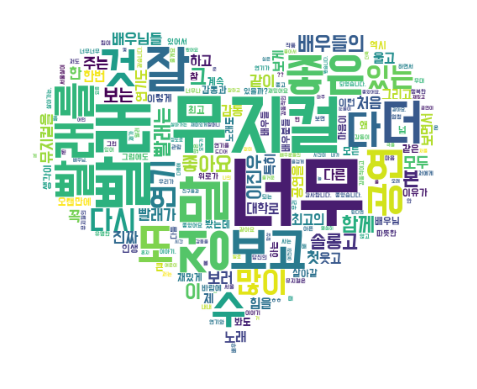

In [255]:
from PIL import Image
import numpy as np

image = Image.open("참고 파일/하트.png")
image = np.array(image)
image

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

spwords = set(STOPWORDS)  # 제외할 단어
spwords.add('너무')
spwords.add('너무너무')
spwords.add('뮤지컬을')
spwords.add('뮤지컬')
spwords.add('너무나')
spwords.add('빨래')
spwords.add('빨래를')

wc = WordCloud(background_color='white', 
               font_path='참고 파일/BMDOHYEON_ttf.ttf',
               mask = image,
               stopwords=spwords)
cloud = wc.generate_from_frequencies(dic)

plt.imshow(cloud)
plt.axis('off')
plt.show()

#### 강사님과 함께

In [ ]:
driver = Chrome()
driver.get('https://tickets.interpark.com/goods/23012969')
time.sleep(2.5)

# 공백이 있을 때는 . 으로 수정
driver.find_element(By.CLASS_NAME,"popupCloseBtn.is-bottomBtn").click()
time.sleep(0.7)

# 안전한 방법
a = driver.find_elements(By.CLASS_NAME,'navLink')

for i in a:
    if "후기" in i.text:
        i.click()
        print(i.text, i) # i는 셀레니움이 만든 객체임!

box = []

while True:
    a= driver.find_element(By.CLASS_NAME,'pageNumWrap')

    for n in a.find_elements(By.TAG_NAME, 'li'):
        n.click()
        time.sleep(1)
    
        review = driver.find_element(By.CLASS_NAME,'bbsList.reviewList')

        for i in review.find_elements(By.CLASS_NAME, 'bbsItem'):
            title = (i.find_element(By.CLASS_NAME,'bbsTitleText').text)
            content = (i.find_element(By.CLASS_NAME,'bbsText').text)
            box.append([title, content])
    
    try:
        driver.find_element(By.CLASS_NAME,'pageNextBtn').click()
        time.sleep(1)
    except:
        break
    

In [ ]:
driver = Chrome()


link = 'https://tickets.interpark.com/goods/23012969'

for i in range(10):
    driver.get(link)
    driver.implicitly_wait(10) #페이지가 다 뜰때까지 최대 10초 기다린다. 넘으면 에러

### 네이버 산지직송 판매목록 불러오기 (스크롤 내려서)

In [256]:
driver = Chrome()

driver.get("https://shopping.naver.com/fresh/directfarm/home")

In [258]:
from bs4  import BeautifulSoup

html = BeautifulSoup(driver.page_source)

In [264]:
box = []

for i in html.find_all("strong", class_="_1lxNNH5gfD"):
    box.append(i.text)

box

['품평회 대상수상 부산 대저 짭짤이 토마토 2.5kg 특품 대저토마토',
 '거거수산의 실패 없는 벌교 새꼬막 1kg 꼬막 제철 자숙 (2kg부터 주문가능)',
 '대저 짭짤이 토마토 2.5kg 특품 품평회 금상수상',
 '고당도 대저 짭짤이 토마토 2.5kg 로얄과 대저토마토',
 '대저 짭짤이 토마토 2.5kg 로얄과 부산 하늘농원 미니과',
 '당도 자신감 성주 참외 3kg 정품 로얄과 당일 수확',
 '프리미엄 완숙 찰 토마토 5kg 특품 로얄과 신선의자신감',
 '고당도 대저 짭짤이 토마토 2.5kg 로얄과 특품 당도보장',
 '품평회 수상 부산 대저 짭짤이 토마토 2.5kg 로얄과 특품',
 '통영 비진도 자연산 쑥 100g 노지 야생 봄 나물 제철 채소 생쑥']

In [267]:
box = []

for n in range(5):
    html = BeautifulSoup(driver.page_source)
    for i in html.find_all("strong", class_="_1lxNNH5gfD"):
        box.append(i.text)
    
    # 현재 페이지만큼 내려라의 코드
    # 밑에 생겼을 때 다시 0에서 맨 끝까지 가라는 의미가 아님!
    driver.execute_script("window.scrollTo(0,document.body.scrollHeight);")
    
    print(len(set(box)))
    time.sleep(5)
box

20
40
60
80
100


['품평회 대상수상 부산 대저 짭짤이 토마토 2.5kg 특품 대저토마토',
 '거거수산의 실패 없는 벌교 새꼬막 1kg 꼬막 제철 자숙 (2kg부터 주문가능)',
 '대저 짭짤이 토마토 2.5kg 특품 품평회 금상수상',
 '고당도 대저 짭짤이 토마토 2.5kg 로얄과 대저토마토',
 '대저 짭짤이 토마토 2.5kg 로얄과 부산 하늘농원 미니과',
 '당도 자신감 성주 참외 3kg 정품 로얄과 당일 수확',
 '프리미엄 완숙 찰 토마토 5kg 특품 로얄과 신선의자신감',
 '고당도 대저 짭짤이 토마토 2.5kg 로얄과 특품 당도보장',
 '품평회 수상 부산 대저 짭짤이 토마토 2.5kg 로얄과 특품',
 '통영 비진도 자연산 쑥 100g 노지 야생 봄 나물 제철 채소 생쑥',
 '제주 고당도 천혜향  5kg 3kg',
 '부산 대저토마토 대저 짭짤이 토마토',
 '농장에서 갓 따온 신선한 설향 딸기 프리미엄 생딸기 750g',
 '품질좋은 횡성 더덕 깐더덕 특품',
 '[맛없으면 100% 환불] 실패없는 고당도 천혜향 가정용 벌크',
 '국산 서해안 냉동 생물 활 쭈꾸미 1kg 알배기 알주꾸미',
 '고당도 부산 대저 짭짤이 토마토 2.5kg 로얄과 대저토마토',
 '토댁 성주참외 5kg  꿀참외',
 '예약구매무농약 연근 세척 김제연근 특품 암연근 1kg',
 '성주 고당도 꿀 참외 명품 산지직송 5kg',
 '제주 고당도 천혜향  5kg 3kg',
 '부산 대저토마토 대저 짭짤이 토마토',
 '농장에서 갓 따온 신선한 설향 딸기 프리미엄 생딸기 750g',
 '품질좋은 횡성 더덕 깐더덕 특품',
 '[맛없으면 100% 환불] 실패없는 고당도 천혜향 가정용 벌크',
 '국산 서해안 냉동 생물 활 쭈꾸미 1kg 알배기 알주꾸미',
 '고당도 부산 대저 짭짤이 토마토 2.5kg 로얄과 대저토마토',
 '토댁 성주참외 5kg  꿀참외',
 '예약구매무농약 연근 세척 김제연근 특품 암연근 1kg',
 '성주 고당도 꿀 참외 명품 산지직송 5kg',
 '대문어 동해 

# 0307

### 네이버 산지직송 제목, 가격, 평점, 리뷰 개슈

In [1]:
from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
import pandas as pd

In [87]:
driver = Chrome()

driver.get("https://shopping.naver.com/fresh/directfarm/home")

In [88]:
from bs4  import BeautifulSoup

html = BeautifulSoup(driver.page_source)

In [89]:
box = []

for n in range(4):
    html = BeautifulSoup(driver.page_source)
    space = html.find_all("div", class_="_2a0vHVAYuk")
    
    for i in space:
        title = i.find('strong',class_="_1lxNNH5gfD").text.strip()
        price = i.find("div", class_="_1bOB7X9FRd").find('span',class_='_3MzrqSUlwR').text[:-1]
        score = i.find('ul',class_="_2sDon4V7bw").find_all('span',class_='_29gNnX1yLx')[0].text[2:]
        review = i.find('ul',class_="_2sDon4V7bw").find_all('span',class_='_29gNnX1yLx')[1].text

        box.append((title, price, score, review))
    # 현재 페이지만큼 내려라의 코드
    # 밑에 생겼을 때 다시 0에서 맨 끝까지 가라는 의미가 아님!
    driver.execute_script("window.scrollTo(0,document.body.scrollHeight);")
    
    print(len(set(box)))
    time.sleep(5)
box

10
30
50
70


[('품평회 대상수상 부산 대저 짭짤이 토마토 2.5kg 특품 대저토마토', '32,900', '4.7', '7,894'),
 ('거거수산의 실패 없는 벌교 새꼬막 1kg 꼬막 제철 자숙 (2kg부터 주문가능)', '9,900', '4.8', '26,285'),
 ('대저 짭짤이 토마토 2.5kg 특품 품평회 금상수상', '32,900', '4.7', '13,945'),
 ('대저 짭짤이 토마토 2.5kg 로얄과 부산 하늘농원 미니과', '31,900', '4.6', '26,896'),
 ('고당도 대저 짭짤이 토마토 2.5kg 로얄과 대저토마토', '31,900', '4.7', '7,774'),
 ('당도 자신감 성주 참외 3kg 정품 로얄과 당일 수확', '30,800', '4.7', '6,151'),
 ('프리미엄 완숙 찰 토마토 5kg 특품 로얄과 신선의자신감', '29,900', '4.8', '1,298'),
 ('[농장직송] 강농부의 14브릭스 고당도 천혜향', '45,800', '4.8', '966'),
 ('품평회 수상 부산 대저 짭짤이 토마토 2.5kg 로얄과 특품', '31,900', '4.8', '2,410'),
 ('통영 비진도 자연산 쑥 100g 노지 야생 봄 나물 제철 채소 생쑥', '3,900', '4.7', '637'),
 ('품평회 대상수상 부산 대저 짭짤이 토마토 2.5kg 특품 대저토마토', '32,900', '4.7', '7,894'),
 ('거거수산의 실패 없는 벌교 새꼬막 1kg 꼬막 제철 자숙 (2kg부터 주문가능)', '9,900', '4.8', '26,285'),
 ('대저 짭짤이 토마토 2.5kg 특품 품평회 금상수상', '32,900', '4.7', '13,945'),
 ('대저 짭짤이 토마토 2.5kg 로얄과 부산 하늘농원 미니과', '31,900', '4.6', '26,896'),
 ('고당도 대저 짭짤이 토마토 2.5kg 로얄과 대저토마토', '31,900', '4.7', '7,774'),
 ('당도 자신감

In [90]:
sample = pd.DataFrame(box, columns=['상품명','가격','평점','리뷰수'])
sample

,상품명,가격,평점,리뷰수
0,품평회 대상수상 부산 대저 짭짤이 토마토 2.5kg 특품 대저토마토,"32,900",4.7,"7,894"
1,거거수산의 실패 없는 벌교 새꼬막 1kg 꼬막 제철 자숙 (2kg부터 주문가능),"9,900",4.8,"26,285"
2,대저 짭짤이 토마토 2.5kg 특품 품평회 금상수상,"32,900",4.7,"13,945"
3,대저 짭짤이 토마토 2.5kg 로얄과 부산 하늘농원 미니과,"31,900",4.6,"26,896"
4,고당도 대저 짭짤이 토마토 2.5kg 로얄과 대저토마토,"31,900",4.7,"7,774"
...,...,...,...,...
95,유기농 생 우엉 ( 1kg)환자식 이유식 친환경우엉,"12,900",4.8,444
96,머위나물 잎 줄기1kg,"13,000",4.8,61
97,고흥 자연산 돌 문어 1kg[2~4미 급냉],"28,900",4.7,624
98,23년 햇죽순 죽순채 300g 봄채소 국내산 아삭아삭 맹종죽순,"14,900",4.7,997


In [91]:
sample['리뷰수'] = sample['리뷰수'].str.replace(',','')
sample['리뷰수'] = sample['리뷰수'].astype(int)

In [94]:
sample[sample['리뷰수']<=0]

,상품명,가격,평점,리뷰수


#### 강사님과

In [69]:
driver = Chrome()

driver.get("https://shopping.naver.com/fresh/directfarm/home")

In [71]:
total = []

while len(total) < 100:

    products = driver.find_elements(By.CLASS_NAME, "_1OKV3UfxuI")

    for p in products:
        try : 
            name = (p.find_element(By.CLASS_NAME, "_1lxNNH5gfD").text.strip())
            price = int(p.find_element(By.CLASS_NAME, "_3MzrqSUlwR").text[:-1].replace(",", ""))

            a = p.find_element(By.CLASS_NAME,'_2sDon4V7bw').text.split("\n")[1].split("리뷰")
            star = float(a[0])
            review= int(a[1].strip().replace(',',''))


            box = [name, price, star, review]
            if box not in total:
                total.append(box)
        except:
            continue
    driver.execute_script('window.scrollTo(0,document.body.scrollHeight);')
    time.sleep(5)

In [72]:
pd.DataFrame(total, columns=['상품명','가격','별점','리뷰'])

,상품명,가격,별점,리뷰
0,친환경 아쿠아포닉스 미니로메인 500g 샐러드채소 유럽샐러드 여주아쿠아포닉스농장,9800,4.9,35
1,대저토마토 짭짤이 토마토 특품,31900,4.9,58
2,"소문난 맛있는 제수용 돌문어 1kg, 2kg 자연산100% 남해안 문어 숙회",26000,4.8,133
3,통영 자연산 돌문어 1kg 생물 (3미내외)문어 숙회 캠핑 홈파티 제철 수산물,33900,4.7,66
4,"제주 농장직송 고당도 천혜향 5kg, 3kg",45700,4.8,559
...,...,...,...,...
95,딸기 1.6kg 친환경 무농약 생딸기 딸기과일 딸기제철 설향딸기 딸기택배 산지직송 ...,60800,4.7,210
96,고령 설향 딸기 500g+500g 총1kg 생 겨울 제철 택배 겨울철과일,33900,4.7,102
97,예약구매부산 대저 맛있는 로얄과 짭짜리 토마토 2.5kg,17900,4.6,113
98,제주도 콜라비 엄선 선별 5kg(6-10개),15900,4.7,149


## 매크로 
내 컴퓨터를 건들어서 하는 것

In [39]:
import pyautogui as pg
import pyperclip

a = pg.position()

In [107]:
import pyperclip

# a 에 입력되어 있는 좌표로 이동
pg.moveTo(a)
time.sleep(1)
pg.click()

pyperclip.copy('서울 날씨')
pg.hotkey("ctrl","v")
time.sleep(0.7)

pg.write(['enter'])

In [112]:
start = pg.position()
start

Point(x=33, y=267)

In [113]:
end = pg.position()
end

Point(x=698, y=900)

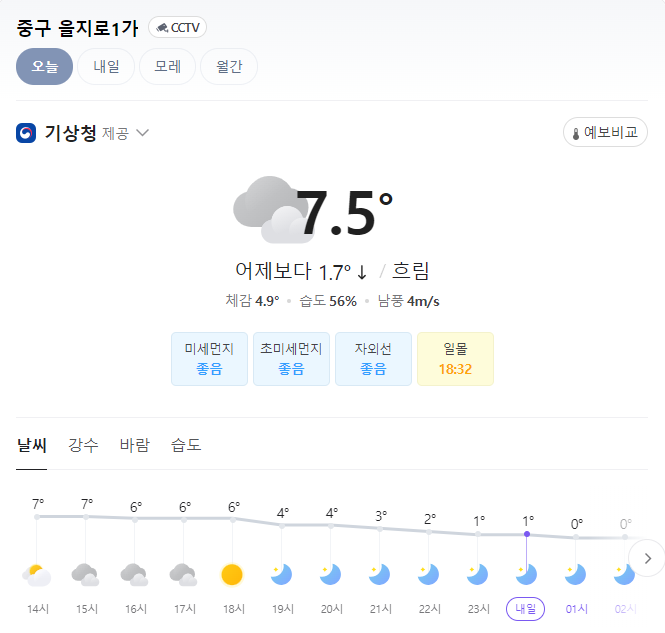

In [114]:
pg.screenshot("서울날씨.png", 
              region=(start[0], start[1], end[0]-start[0],end[1]-start[1]))

### 퀴즈
서울 날씨, 시흥 날씨, 청주 날씨, 부산 날씨, 강원도 날씨를 자동으로 검색해서 해당 지역에 날씨를 캡쳐하여 저장하는 프로그램을 만들어보세요.

In [126]:
s_a = pg.position() # 네이버 초기화면
a = pg.position() # 검색 이후 기존 창 위치
# start = pg.position()
# end = pg.position()

In [128]:
import pyperclip

# a 에 입력되어 있는 좌표로 이동
pg.moveTo(s_a)
time.sleep(1)
pg.click()

pyperclip.copy('서울 날씨')
pg.hotkey("ctrl","v")
time.sleep(0.7)

pg.write(['enter'])

pg.screenshot(f"{i}.png",region=(start[0], start[1], 
                                     end[0]-start[0],end[1]-start[1])).save(f'생성 파일/{i}.png')
time.sleep(0.7)

lst = ['시흥 날씨','청주 날씨','부산 날씨','강원도 날씨']

for i in lst:
    
    pg.moveTo(a)
    time.sleep(1)
    pg.click()
    
    pg.hotkey("ctrl","a")
    pyperclip.copy(i)
    pg.hotkey("ctrl","v")
    time.sleep(0.7)

    pg.write(['enter'])
    time.sleep(0.7)

    pg.screenshot(f"{i}.png",region=(start[0], start[1], 
                                     end[0]-start[0],end[1]-start[1]))
    time.sleep(0.7)
#     pg.hotkey("ctrl","a")
#     pyautogui.press('backspace')
#     time.sleep(0.7)

In [130]:
# 백스페이스
pg.moveTo(a)
time.sleep(1)
pg.click()

pg.hotkey("ctrl","a")

pg.press('backspace')


In [ ]:
# 강사님은 치고 난 이후 네이버를 클릭해서 맨 첨 화면으로 돌아가는 방법 사용

In [42]:
a = pg.locateOnScreen('blog1.png', confidence=0.7)
a = pg.center(a)
pg.moveTo(a)

In [ ]:
# 화면 상에서 여러개 잡을 때
# locateAllOnScreen

a = pg.locateAllOnScreen("5.png", confidence = 0.9)
for i in a:
    b = pg.center(i)
    pg.moveTo(b)
    time.sleep(1)